(sec:LTI)=
# Linearni časovno invariantni sistemi z eno prostostno stopnjo

Sistema z eno prostostno stopnjo (ang. single degree of freedom system - SDOF) lahko opišemo z nehomogeno diferencialno enačbo drugega reda:
$$
m\,\ddot{x}(t)+c\,\dot{x}(t)+k\,x(t)=f(t),
$$

kjer je $f(t)$ vzbujevalna sila. Rešitev nehomogone enačbe je v obliki:

$$
x(t) = x_{h}(t) + x_{p}(t),
$$

kjer je $x_{p}$ partikularna in $x_{h}$ homogena rešitev.

## Prosti odziv (homogena rešitev)

Če vzbujevalne sile ni $f(t)=0$, je homogena rešitev pridobljena iz:

$$
m\,\ddot{x}_{h}(t)+c\,\dot{x}_{h}(t)+k\,x_{h}(t)=0.
$$

Uporabimo nastevek za rešitev $x_{h}(t)$:

$$
x_{h}(t)=X_{h}\,e^{\lambda \,t},
$$

kjer sta amplituda premika $X_{h}$ in lastna vrednost $\lambda$ neznani (in ju je treba določiti). Vstavimo nastavek v diferencialno enačbo:

$$
\lambda^2\,m\,X_{h}\,e^{\lambda \,t}+\lambda\,c\,X_{h}\,e^{\lambda \,t}+k\,X_{h}\,e^{\lambda \,t}=0.
$$

Izraz uredimo:

$$
\left(\lambda^2\,m+\lambda\,c+k\right)\,X_{h}\,e^{\lambda \,t}=0.
$$

Netrivialno ($X_{h}\,e^{\lambda \,t}\neq0$) rešitev določimo na podlagi karakteristične enačbe:

$$
\lambda^2\,m+\lambda\,c+k=0.
$$

Rešitev karakteristične enačbe je:

$$
\lambda_{1,2}=-\frac{c}{2\,m} \pm \frac{\sqrt{c^2-4\,k\,m}}{2\,m},
$$

kjer sta $\lambda_{1,2}$ lastni vrednosti sistema (v splošnem kompleksno število).


Glede na razmerje med vztrajnostno, elastično in dušilno silo je rešitev:

* **nadkritično dušeno**: če sile dušenja prevladajo nad vztrajnostnimi in prožnostnimi sile ($c^2\geq 4\,k\,m$),
* **kritično dušeno**: če so sile dušenja enake vztrajnostnim in prožnostnim silam ($c^2=4\,k\,m$),
* **podkritično dušeno**: če vztrajnostne in prožnostne sile prevladajo nad dušilnimi ($c^2\leq 4\,k\,m$).

V primeru nadkritično in kritično dušenega sistema je rešitev v realni obliki in gibanje ni oscilatorno.

V okviru te knjige se  osredotočamo na podkritično dušen primer, ko so kompleksne lastne vrednosti konjugirani pari. Masa $m$, dušenje $c$ in togost $k$ pa definirajo nedušeno lastno krožno frekvenco (tudi resonančna frekvenca, lastna frekvenca):

$$
\omega_0 = \sqrt{\frac{k}{m}}.
$$

Tukaj je pomembno omeniti, da pri linearnih sistemih prednapetje ne spremeni lastne frekvence.

Nadalje, če je kritično dušenje opredeljeno kot:

$$
c_{c} = 2\,\sqrt{k\,m},
$$

potem je dušenje mogoče definirati s pomočjo razmernika dušenja:

$$
\delta = \frac{c}{c_{c}}.
$$

Z nezadušeno lastno frekvenco $\omega_0$ in razmernika dušenja $\delta$ lahko homogeno diferencialno enačbo prepišemo v standardno obliko:

$$
\ddot{x}_{h}(t)+2\,\delta\,\omega_0\,\dot{x}_{h}(t)+\omega_0^2\,x_{h}(t) =0.
$$

Nadalje lahko $\omega_0$ in $\delta$ vstavite v izraz za lastne vrednosti:

$$
\lambda_{1,2}=-\delta\, \omega_0 \pm \mathrm{i}\,\omega_{d},
$$

kje se:

$$
\omega_{d} = \omega_0\,\sqrt{1-\delta^2}
$$

imenuje dušena lastna krožna frekvenca.

Izpeljane lastne vrednosti vstavimo v nastavek za homogeno rešitev $x_{h}(t)$. Ker imamo dve lastni vrednosti, je splošna rešitev vsota obeh:

$$
\begin{split}
     x_{h}(t)&=X_{h,1}\,e^{\lambda_1 \,t}+X_{h,2}\,e^{\lambda_2 \,t}\\
     &=e^{-\delta\, \omega_0\,t}\,
     \big(
     X_{h,1}\,e^{+ \mathrm{i}\, \omega_{d}\,t}+X_{h,2}\,e^{- \mathrm{i}\, \omega_ {d} \,t}
     \big),
\end{split}
$$

kjer sta konstanti $X_{h,1}$ in $X_{h,2}$ odvisni od začetnih pogojev.

Kasneje bo jasno, da so začetni pogoji, pri katerih sistem začne iz ravnotežja s hitrostjo, ki ni nič:

$$
\begin{aligned}
		x(0)&=0\to& X_{h,1}+X_{h,2}&=0\\
		\dot x(0)&=\dot x_0\to& X_{h,1}\,\lambda_1+X_{h,2}\,\lambda_2&=\dot x_0
	\end{aligned}
$$

še posebej pomembne in vodijo v rešitev:

$$
x_{h}(t)=\frac{\dot x_0}{\omega_{d}}\,e^{-\delta\,\omega_0\,t}\,\sin(\omega_{d}\,t).
$$


Odziv je sestavljen iz ovojnice ${\dot x_0}/{\omega_{d}}\,\exp(-\delta\, \omega_0\,t)$, za katero je značilna stopnja razpada $\delta\, \omega_0$ in nihajoči del $\sin(\omega_{d}\,t)$, glejte sliko spodaj.

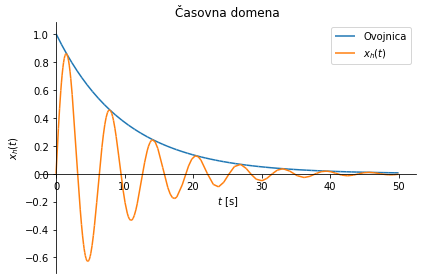

In [16]:
import sympy as sym
t, ω_0, ω_d, d_x_0, δ= sym.symbols('t, \omega_0, \omega_d, d_x_0, \delta', real=True)
podatki = {ω_0: 1, d_x_0: 1, δ: 0.1}

ω_d = ω_0 * sym.sqrt(1-δ**2)

ovojnica = d_x_0/ω_d * sym.exp(-δ*ω_0*t)

x = ovojnica * sym.sin(ω_d*t)

p1 = sym.plot(ovojnica.subs(podatki), (t,0,50), line_color='C0', xlabel='$t$ [s]', ylabel='$x_h(t)$', title='Časovna domena',
             label='Ovojnica', show=False)
p2 = sym.plot(x.subs(podatki), (t,0,50), line_color='C1', 
             label='$x_h(t)$', show=False)
p1.extend(p2)
p1.legend = True
p1.show()

## Harmonsko vzbujanje

Nadaljujemo z rešitvijo gibalne enačbe za primer harmonskega vzbujanja:

$$
	f(t)=F\,e^{ \mathrm{i}\,\omega\,t}=F\,\underbrace{\big(\cos(\omega\,t)+ \mathrm{i}\,\sin(\omega\,t)\big)}_{e^{ \mathrm{i}\,\omega\,t}},
$$

kjer je $F$ amplituda sile (v splošnem kompleksna vrednost) in $\omega$ krožna frekvenca vzbujanja. 


Partikulano rešitev $x_p(t)$ določimo iz enačbe:

$$
	m\,\ddot{x}_{p}(t)+c\,\dot{x}_{p}(t)+k\,x_{p}(t)=f(t),
$$


tako, da predpostavimo harmonski odziv:

$$
	x_{p}(t)=X_{p}\,\,e^{ \mathrm{i}\,\omega\,t},
$$

kjer je $X_{p}$ neznana kompleksna amplituda partikularne komponente (včasih imenovana tudi fazor). Nadaljujemo z izpeljavo:

$$
	-\omega^2\,m\,X_{p}\,e^{ \mathrm{i}\,\omega\,t}+ \mathrm{i}\,\omega\,c\,X_{p}\,e^{ \mathrm{i}\,\omega\,t}+k\,X_{p}\,\,e^{ \mathrm{i}\,\omega\,t}=F\,e^{ \mathrm{i}\,\omega\,t}.
$$

Netrivialna rešitev zahteva $e^{ \mathrm{i}\,\omega\,t}\neq 0$ in zato rešitev iščemo na podlagi enačbe:

$$
	-\omega^2\,m\,X_{p}+  \mathrm{i}\,\omega\,c\,X_{p}+k\,X_{p}=F,
$$

kar vodi v določitev razmerja med odzivom $X_p$ in vzbujanjem $F$:

$$
	\frac{X_{p}}{F}=\frac{1}{-\omega^2\,m+ \mathrm{i}\,\omega\,c+k}.
$$


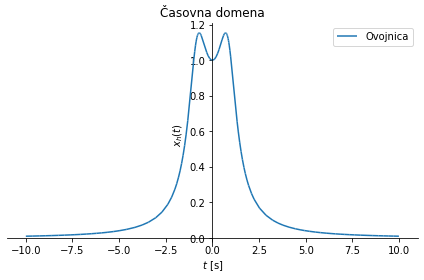

In [25]:
import sympy as sym
ω, m, c, k= sym.symbols('\omega, m, c, k', real=True)
podatki = {m: 1, c: 1, k: 1}
i = sym.I

α = 1/(-ω**2 * m + i*ω*c + k)

p1 = sym.plot(sym.Abs(α.subs(podatki)), (ω,-10,10), line_color='C0', xlabel='$t$ [s]', ylabel='$x_h(t)$', title='Časovna domena',
             label='Ovojnica', show=False)
#p2 = sym.plot(x.subs(podatki), (t,0,50), line_color='C1', 
#             label='$x_h(t)$', show=False)
#p1.extend(p2)
p1.legend = True
p1.show()

Partikularna rešitev je torej:

$$
	x_{p}(t)=\frac{1}{-\omega^2\,m+ \mathrm{i}\,\omega\,c+k}\,F%
	\,e^{ \mathrm{i}\,\omega\,t}.
$$

## Prehodni odziv in odziv v stacionarnem stanju.

Najprej smo določili homogeno rešitev $x_{h}(t)$, katera predstavlja prehodni odziv na neko začetno motnjo. Partikularna rešitev $x_{p}(t)$ predstavlja rešitev na stacionarno harmonsko motnjo. Rešitev v splošnem definira vsota obeh

## Frekvečna prenosna funkcija

Najprej se bomo osredotočili zgolj na partikularno rešitev (vendar več ne bomo uporabljali podpisa $p$):

$$
	\frac{X}{F}=\frac{1}{-\omega^2\,m+ \mathrm{i}\,\omega\,c+k}.
$$

Kot zgornji izraz predstavlja frekvenčni odziv, se imenuje **frekvenčna prenosna funkcija** (ang. Frequency Response Function, tudi FRF, glejte TBA za opis načina kako se FRF dobi iz homogene rešitve}:

$$
	\alpha(\omega)=\frac{1}{-\omega^2\,m+ \mathrm{i}\,\omega\,c+k}.
$$



Z uporabo nedušene laste krožne frekvence $\omega_0^2=k/m$, razmernika dušenja $c=\delta\,2\,\sqrt{k\,m}$ in relativne frekvence $r=\frac{\omega}{\omega_0}$, dobimo frekvenčni odziv v standardni obliki:
$$
	\alpha(\omega)=\frac{1}{k}\cdot\frac{1}{1-r^2+2\, \mathrm{i}\,\delta\,r}.
$$


$\alpha(\omega)$ se imenuje frekvenčna prenosna funkcija ali bolj natančno **dimenzijska frekvenčna prenosna funkcija** (ang. dimensional frequency response function). V nasprotju z $\alpha(\omega)$ je $H_0(\omega)$ opredeljena kot:


$$
	\begin{split}
		H_0(\omega)&=\frac{X(\omega)}{X_0}
	\end{split}
$$

in se v nekaterih knjigah (npr.: {cite:t}`geradin2014mechanical`) imenovana **brezdimenzijska frekvenčna prenosna funkcija** (ang. nondimensional frequency response function). V izrazu zgoraj je statični poves $X_0$ zaradi statične sile $F$ definiran kot:

$$
	X_0=\frac{F}{k}.
$$

Harmonski odziv $X(\omega)$ lahko z brezdimenzionalno frekvenčno prenosno funkcijo definiramo kot:
$$
	\begin{split}
		H_0(\omega)&=\frac{X(\omega)}{X_0}\\
		&=\frac{k}{-\omega^2\,m+ \mathrm{i}\,\omega\,c+k}\\
		&=\frac{1}{1-r^2+ \mathrm{i}\,2\,\delta\,r},
	\end{split}
$$

Oziroma:

$$
	\alpha(\omega)=\frac{H_0(\omega)}{k}.
$$

S FRF je mogoče odziv stacionarnega stanja pri harmonskem vzbujanju s $\omega_f$ opisati z:

$$
x(t)=\alpha(\omega=\omega_f)\,F\,e^{ \mathrm{i}\,\omega_f\,t}.
$$

### Različne oblike FRF

Dimenzijski FRF je smiseln, saj je statični odklon $X_0$ težko izmeriti in se pogosto merita vzbujevalna sila in odzivni pospešek. Namesto pospeška pogosto merimo še hitrost in premik). Posledično obstajajo različne oblike frekvenčne prenosne funkcije:
$$
	\begin{aligned}
		\alpha(\omega)&=\frac{X(\omega)}{F(\omega)},&&\textrm{podajnost ali receptanca (ang. receptance),}\\
		Y(\omega)&=\frac{\dot X(\omega)}{F(\omega)}= \mathrm{i}\,\omega\,\alpha(\omega),&&\textrm{pomičnost (ang. mobility),}\\
		A(\omega)&=\frac{\ddot X(\omega)}{F(\omega)}=-\omega^2\,\alpha(\omega),&&\textrm{pospešenost (ang. accelerance),}\\
	\end{aligned}
$$


kjer $\dot X(\omega)$ in $\ddot X(\omega)$ označujejo kompleksni amplitudi hitrosti ali pospeška v frekvenčni domeni.

:::{note}

Inverzna vrednost pospešenosti **dinamična masa** ($F/\ddot{X}$), inverzna vrednost pomičnosti je **mehanska impedanca** ($ F/\dot{X}$) in inverzna od podajnosti **dinamična togost** ($F/X$).

:::